In [1]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
irisDate = pd.read_csv("dados/iris_data.csv")
irisDate.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
irisDate.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
irisDate.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


In [5]:
irisDate.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Class           object
dtype: object

In [6]:
# Separa atributos e variavel target
X = irisDate[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
y = irisDate.Class

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [8]:
# Criar classificador
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
modelo = clf.fit(X_train, y_train)
previsao = modelo.predict(X_test)

In [10]:
confusion_matrix(y_test, previsao)

array([[10,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 11]], dtype=int64)

In [11]:
accuracy_score(y_test, previsao)

0.9333333333333333

# Random Forest Classifier - I

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits

In [13]:
digitos = load_digits()

In [14]:
data = scale(digitos.data)

In [15]:
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [16]:
data.shape

(1797, 64)

In [17]:
n_observ, n_features = data.shape

In [18]:
n_observ

1797

In [19]:
n_features

64

In [20]:
n_digits = len(np.unique(digitos.target))
labels = digitos.target

In [21]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [22]:
n_digits

10

In [23]:
clf = RandomForestClassifier(n_estimators = 10)

In [24]:
# Principais parametros RandomForestClassifier

# n_estimators : quanto maior melhor, padrão é 10
# max_depth : o padrão é 'none', e nesse caso as arvores completas são criadas. Necessario ajustar para evitar overfitting
# max_features : diferentes valores devem ser testados, impacta na forma como os modelos são distribuidos na arvore
# criterion : define a forma como o algoritimo fará a divisão dos atributos e a classificação dos nodes em cada arvore

In [25]:
clf = clf.fit(data,labels)

In [26]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
scores = clf.score(data,labels)
scores

0.9994435169727324

In [28]:
importances = clf.feature_importances_
indices = np.argsort(importances)

In [29]:
ind = []
for i in indices:
    ind.append(labels[i])

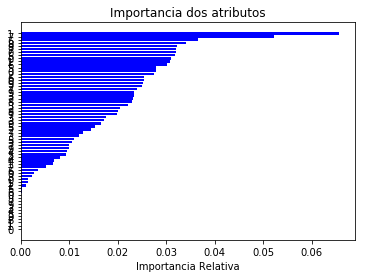

In [30]:
plt.figure(1)
plt.title("Importancia dos atributos")
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), ind)
plt.xlabel("Importancia Relativa")
plt.show()

# Random Forest Classifier II

In [31]:
!pip install treeinterpreter

In [32]:
# imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_iris

In [33]:
iris = load_iris()

In [34]:
rf = RandomForestClassifier(max_depth=4)

In [35]:
idx = list(range(len(iris.target)))

In [36]:
# Randomiza
np.random.shuffle(idx)

In [37]:
rf.fit(iris.data[idx][:100], iris.target[idx][:100])

C:\Users\eweisan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
# Retorna a probabilidade
instance = iris.data[idx][100:101]
print(rf.predict_proba(instance))

[[1. 0. 0.]]


In [39]:
prediction, bias, contributions = ti.predict(rf, instance)
print('Previsões: ', prediction)
print('Contribuição dos Atributos: ')
for item, feature in zip(contributions[0], iris.feature_names):
    print(feature, item)

Previsões:  [[1. 0. 0.]]
Contribuição dos Atributos: 
sepal length (cm) [ 0.03690909 -0.00918182 -0.02772727]
sepal width (cm) [0. 0. 0.]
petal length (cm) [ 0.127 -0.072 -0.055]
petal width (cm) [ 0.49709091 -0.27381818 -0.22327273]
